# The purpose of the project.
+ Perform data preprocessing and study them, find interesting features and dependencies that exist in the real estate market of the city of St. Petersburg and neighboring settlements.
+ Try to understand what parameters make up the sale price.
+ Calculate the average price per square meter in 10 localities with the largest number of ads.
+ Understand how the cost of objects in the city depends on the distance to the city center of St. Petersburg

In [1]:
import pandas as pd

In [2]:
try:
    df = pd.read_csv('/real_estate_data.csv', delimiter='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', delimiter='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11406,0,3200000.0,31.9,2017-09-23T00:00:00,1,NaN,9.0,17.6,2,NaN,...,6.1,0.0,Санкт-Петербург,43048.0,15552.0,0.0,NaN,0.0,NaN,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

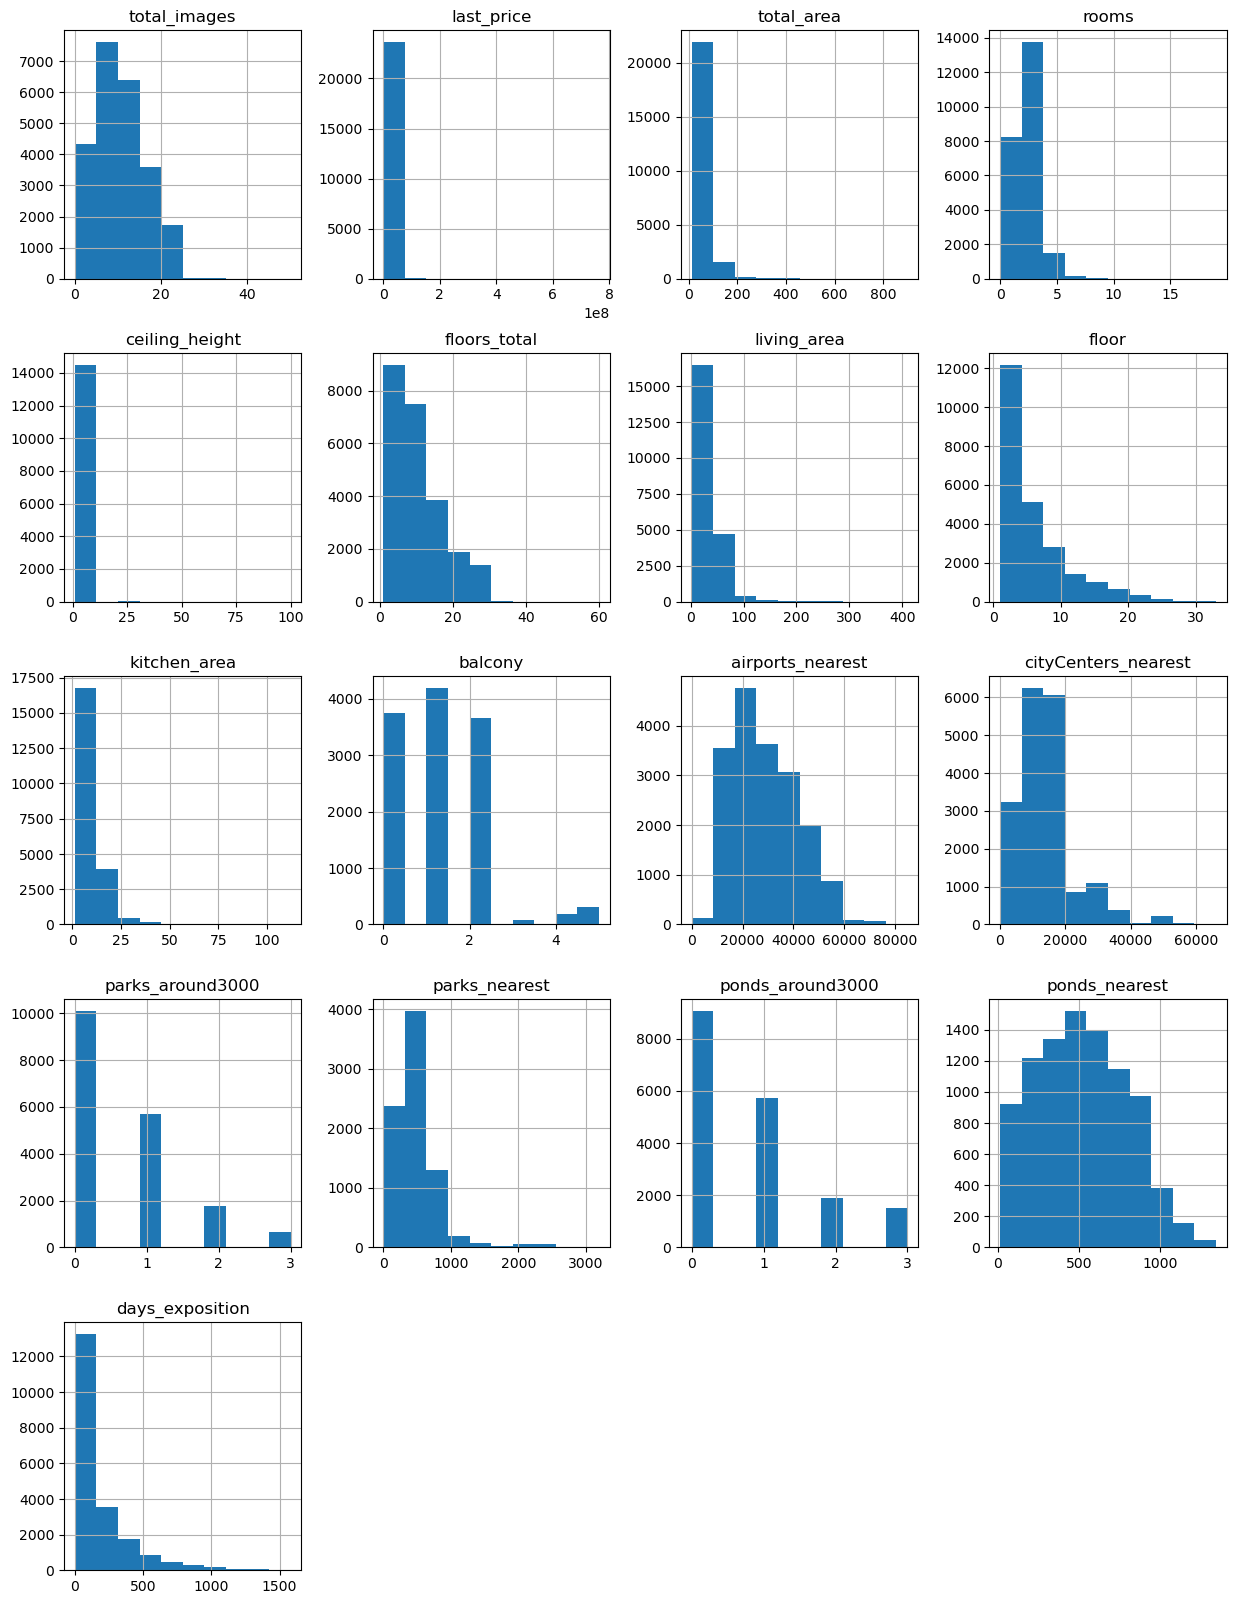

In [7]:
df.hist(figsize=(15, 20))

**Output:**
* Missing values
* Incorrect data types
* * The name of the citycenter_nearest column is out of the general rule.





# 2.  Data preprocessing

In [8]:
df.duplicated().sum() # there are no obvious duplicates

0

For the convenience of perception, I change the field **last_price** to type int

In [9]:
df['last_price'] = df['last_price'].astype(int)

Since the time of the ad placement is not specified (only the date), I change the date format

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


I will replace all the values 0 in the rooms field with the value 1. Since the area of such apartments is small and most of them have the True attribute by the studio field.

In [11]:
df['rooms'] = df['rooms'].replace(0, 1)
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

I replace all the NaN values in the **is_apartment** field with **False** since the values of **True** in this field are 50, that is, the number of apartments indicated is clearly small, and where they were missed, the probability that the objects are not apartments, in my opinion, is high.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [13]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
df.columns.tolist() 

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [14]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

The values are too small in the minimum values and too large in the maximum values

In [15]:
df[df['ceiling_height'] > 5].tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21824,20,2450000,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22309,20,5300000,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


I am writing a function that changes the format of 27.0 or 32.0 to 2.70 or 3.20 (corrects mistakes made at the filling stage), changes the values of **NaN** to a height of 2.65. I apply the function to the column.

In [16]:
def convert_height(fl):
    if fl > 10 and fl < 35:
        return '{:,.2f}'.format(fl/10)
    else:
        return fl

df['ceiling_height'] = df['ceiling_height'].apply(convert_height).astype(float)

I will filter out all values less than 2.35 and those greater than 5.0 (ceilings cannot be more than 5 meters and less than 2.20) and apply the filter to the entire dataframe.In other words, I will remove the minimum and maximum values that do not stand up to criticism.

In [17]:
df = df[(df.ceiling_height > 2.35) & (df.ceiling_height < 5.0)]
df = df.reset_index(drop=True)

In [18]:
df['ceiling_height'].describe()

count    14466.000000
mean         2.725959
std          0.270341
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

I will replace all values of **NaN** in the **balcony** field with 0, I will evaluate **Nan** as the absence of a balcony. And I replace the data type with **int**

In [19]:
df['balcony'] = df['balcony'].fillna(0).astype(int)

I will work on **locality_name**, change *village* to *village*, then create a list of what I want to remove from the name. I will remove all these lines from the names (get rid of implicit duplicates)

In [20]:
df['locality_name'] = df['locality_name'].replace(to_replace=r'поселок', value='посёлок', regex=True)

In [21]:
#list of info to be deleted 
remove_list = ['деревня ', 'посёлок ', 'городского типа ', 'село ', 'городской ']

for string in remove_list:
    df['locality_name'] = df['locality_name'].replace(to_replace=string, value='', regex=True)


There are 49 missing values for the **locality_name** field, since this value is not large in our sample, I will simply delete all **NaN**

In [22]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

Since restoring the number of storeys of buildings without specifying the exact address is not a trivial and labor-intensive task. Missing values in the field **floors_total** = 86, I will delete all these values.

In [23]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True)

#3. Add new columns to the table

I add a field, the price per square meter and assign it the data type **int** (I discard the fractional part and for better perception)

In [24]:
df['price_square'] = df['last_price'] / df['total_area']
df['price_square'] = df['price_square'].astype(int)

In [25]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

I am writing a function that returns floors by condition (first, last, others)
I add to the dataframe a column **type_floor** filled with the values that the function returned.

In [26]:
def convert_floor(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'another'

df['type_floor'] = df.apply(convert_floor, axis=1)

In [27]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor
14438,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,0.0,NaN,1.0,806.0,519.0,129903,3,10,2016,another
14439,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,352.0,1.0,675.0,239.0,73717,4,8,2016,another
14440,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,another
14441,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,another
14442,4,1350000,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,41795,4,7,2017,first


The distance to the city center in kilometers (I convert from m to km and round to integer values).

In [28]:
df['distance_city_center'] = df['city_centers_nearest']/1000

In [29]:
def round_distance(val):
    if pd.isna(val):
        return val
    else:
        return round(val)

df['distance_city_center'] = df['distance_city_center'].apply(round_distance)

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor,distance_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,another,16.0
1,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,another,8.0
2,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524,6,2,2017,another,15.0
3,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525,3,11,2017,another,14.0
4,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366.0,82943,5,7,2017,last,33.0


# 4. Research data analysis

count    14443.000000
mean        61.836266
std         36.804970
min         12.000000
25%         41.000000
50%         53.300000
75%         71.300000
max        900.000000
Name: total_area, dtype: float64

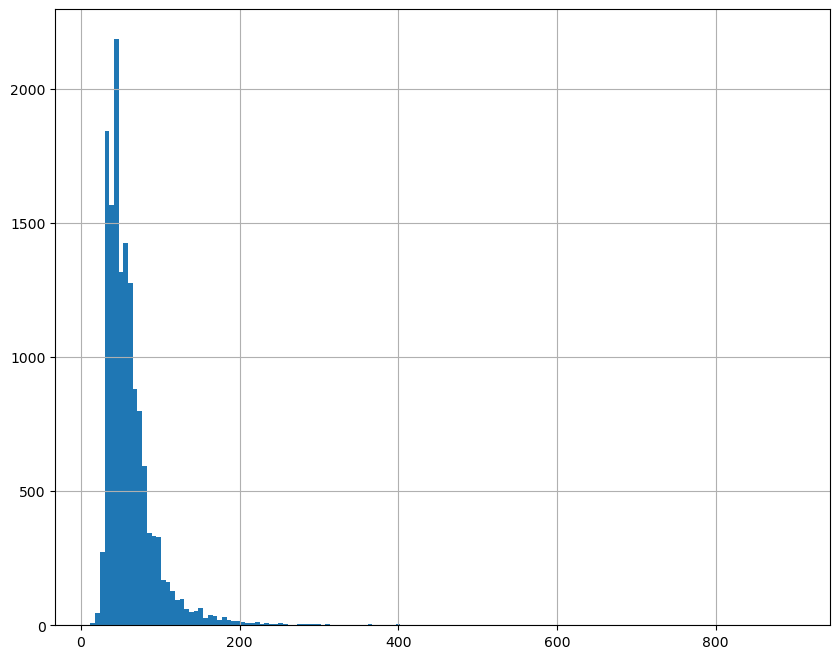

In [31]:
df['total_area'].hist(bins=150, figsize=(10,8))
df['total_area'].describe()

The data distribution is normal.There are emissions, but they are not critical.The bulk of the apartments for sale have an area from 40 square meters to 70, and the average value for the sample is 60.3.I added the discribe method to have a more detailed idea of the area of the apartments.

count    13655.000000
mean        35.653980
std         22.789568
min          2.000000
25%         19.200000
50%         30.800000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

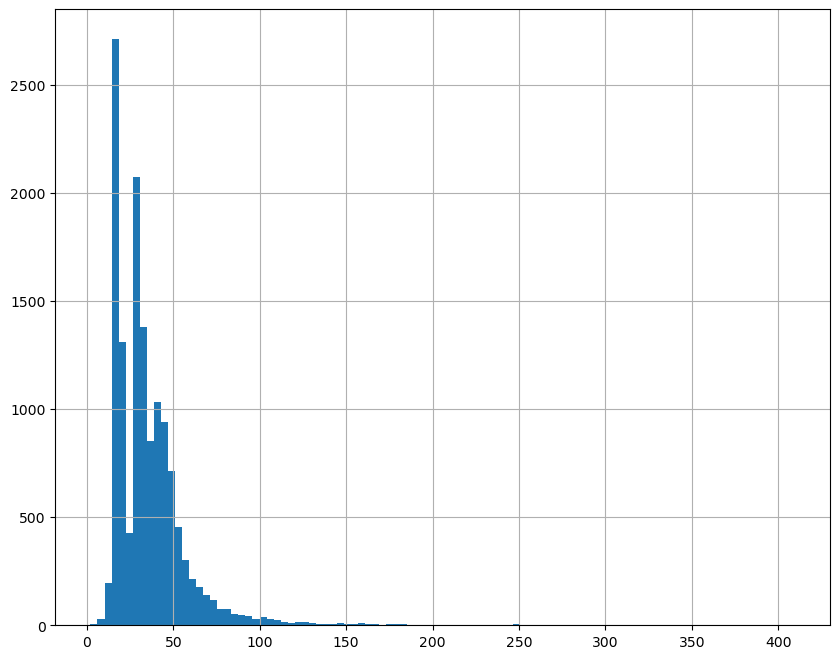

In [32]:
df['living_area'].hist(bins=100, figsize=(10,8))
df['living_area'].describe()

The living area distribution is normal. Apartments with a living area from 18.6 to 42.3, with an average value of 34.4.Prevail in ads.Although there are of course notable specimens.

count    13517.000000
mean        10.562962
std          6.034430
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

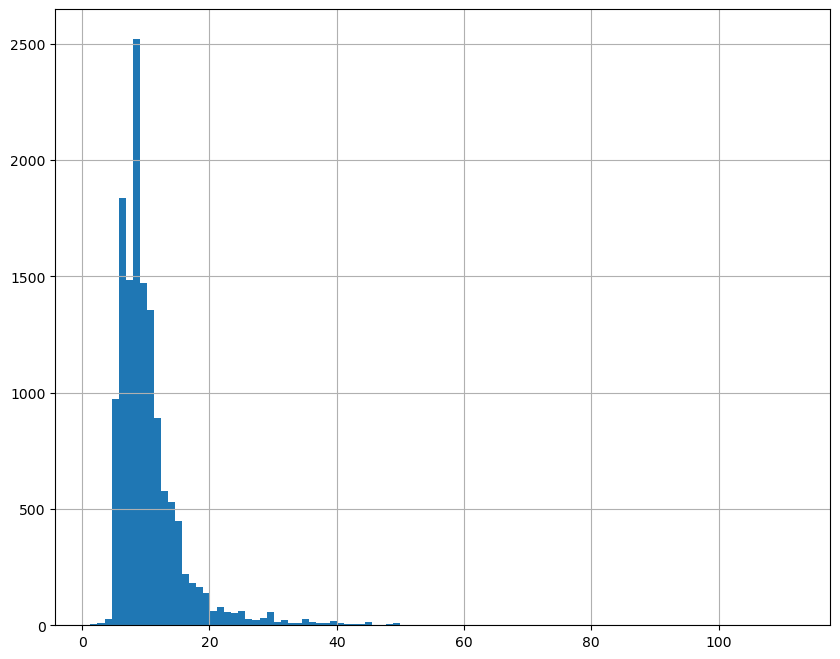

In [33]:
df['kitchen_area'].hist(bins=100, figsize=(10,8))
df['kitchen_area'].describe()

Kitchen area. The data distribution is normal. The bulk of apartments with a kitchen area from 7 square meters to 12.

count    1.444300e+04
mean     6.810959e+06
std      1.005557e+07
min      1.219000e+04
25%      3.580000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

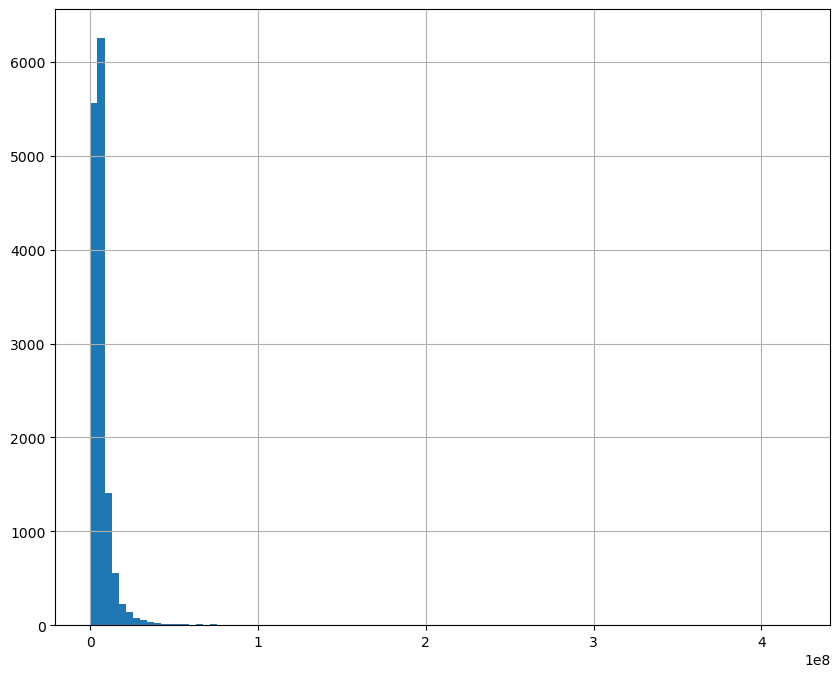

In [34]:
df['last_price'].hist(bins= 100, figsize=(10,8))
df['last_price'].describe()

In [35]:
df['last_price'].median()

4850000.0

count    14443.000000
mean         2.142422
std          1.089730
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

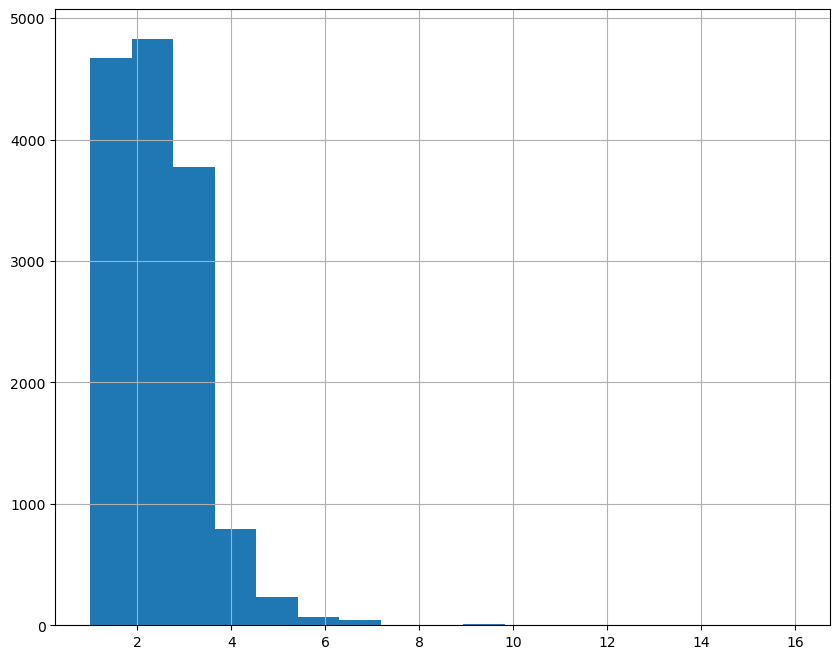

In [36]:
df['rooms'].hist(bins=17, figsize=(10,8))
df['rooms'].describe()

Basically, standard 1, 2, 3 bedroom apartments are on sale.Most of all, 1 room (studios) are on sale, then 2 rooms and further descending. The maximum number of rooms is also impressive: 19.

count    14443.000000
mean         2.725671
std          0.270166
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

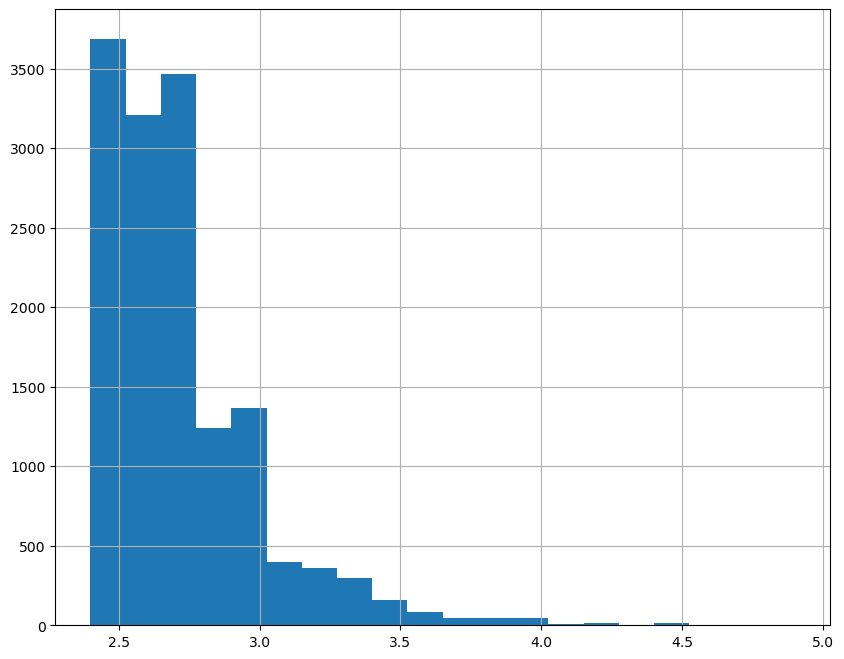

In [37]:
df['ceiling_height'].hist(bins=20, figsize=(10,8))
df['ceiling_height'].describe()

Ceiling height, from minimum 2.40 to maximum 4.90 with an average height of 2.69. I don't think the median will be much different.

count    14443.000000
mean         5.623485
std          4.614802
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

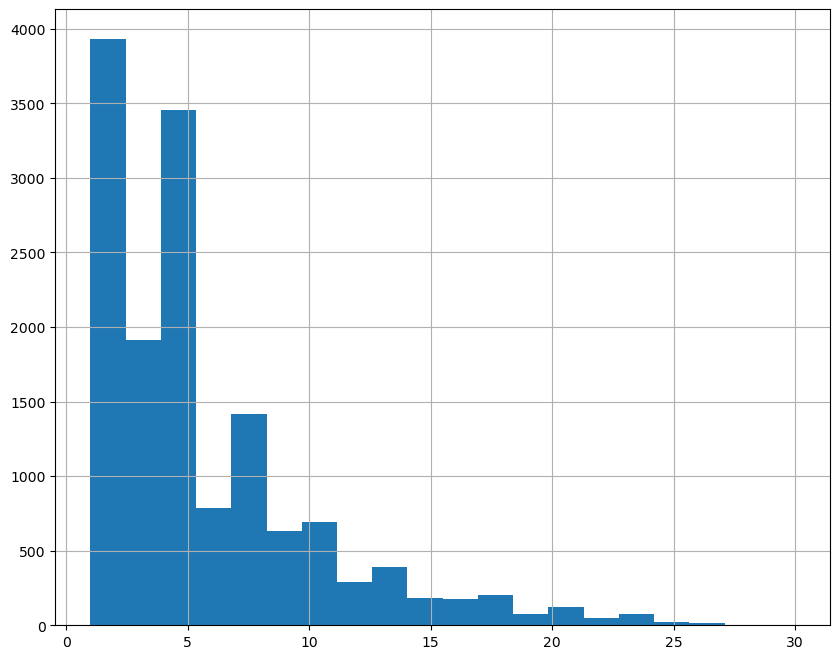

In [38]:
df['floor'].hist(bins=20, figsize=(10,8))
df['floor'].describe()

The number of floors for sale of apartments in St. Petersburg and the surrounding area , the most offers are up to the 8th floor.

<AxesSubplot:>

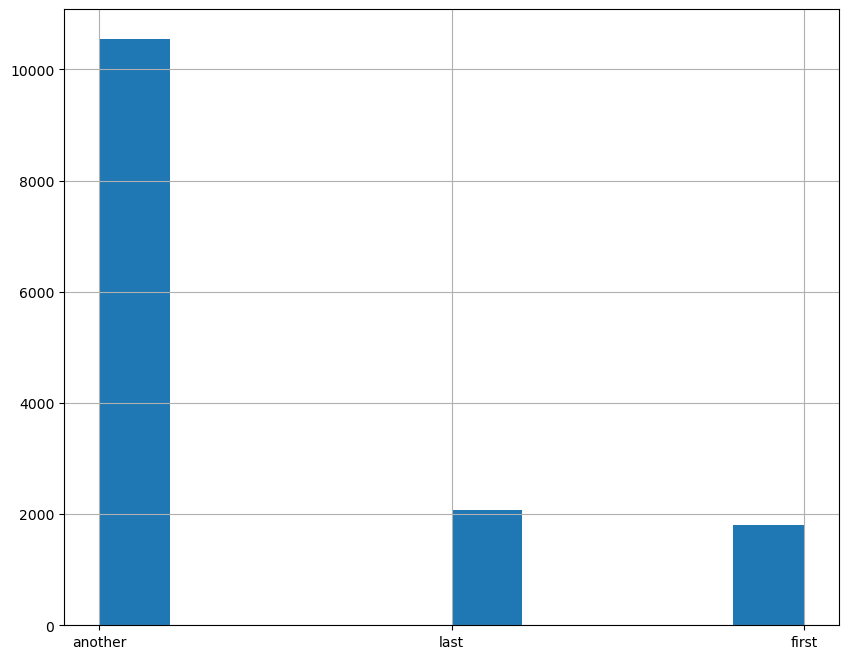

In [39]:
df['type_floor'].hist(figsize=(10,8))

In [40]:
df['type_floor'].value_counts()

another    10555
last        2077
first       1811
Name: type_floor, dtype: int64

The first and last floors are not offered, and their offer is not critical. Most of the sentences do not include this phrase.

count    14443.000000
mean        10.178702
std          6.198734
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

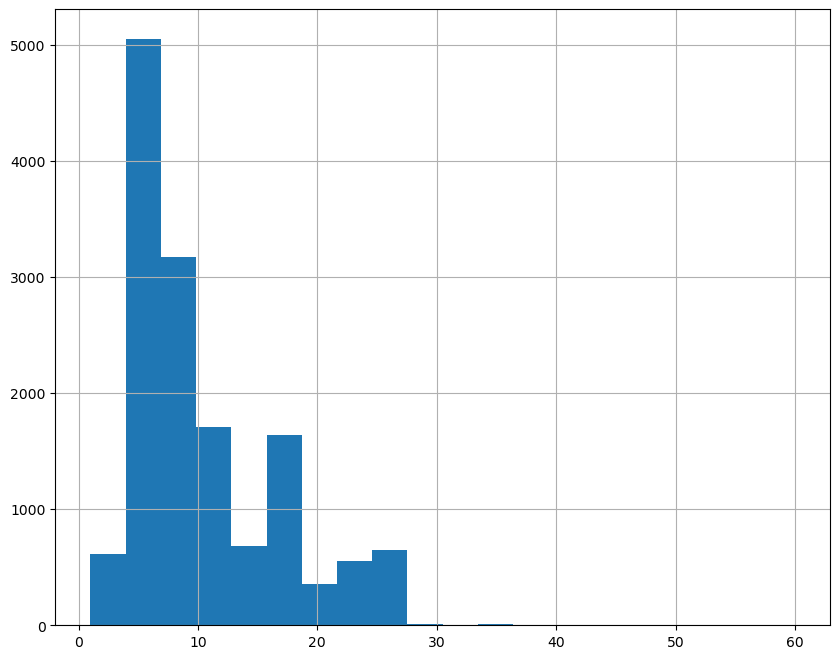

In [41]:
df['floors_total'].hist(bins=20, figsize=(10,8))
df['floors_total'].describe()

<AxesSubplot:>

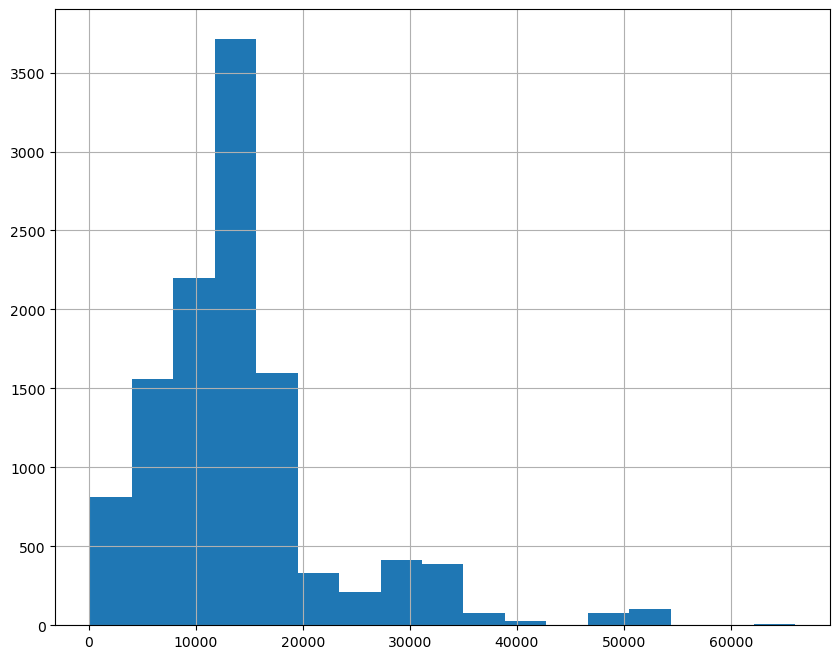

In [42]:
df['city_centers_nearest'].hist(bins=17, figsize=(10,8))

<AxesSubplot:>

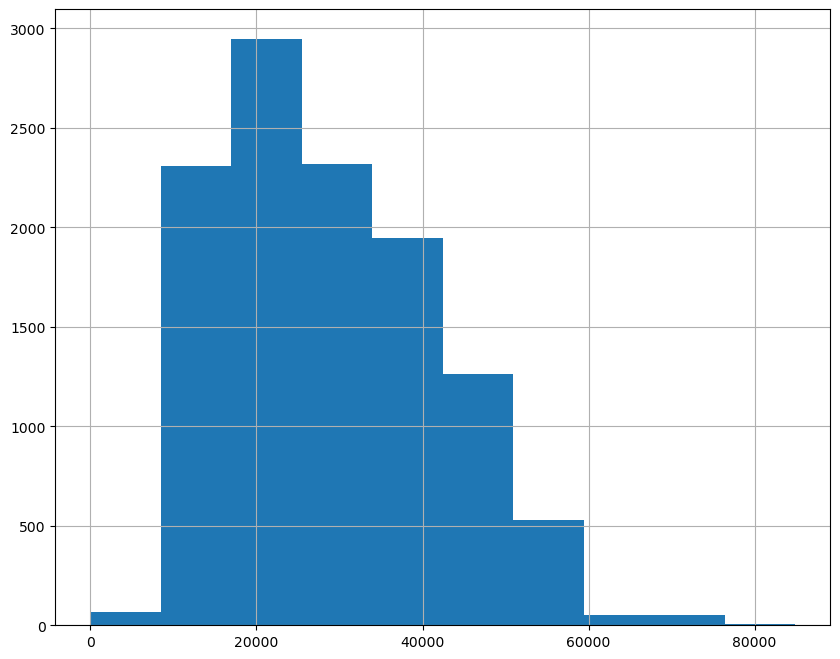

In [43]:
df['airports_nearest'].hist(figsize=(10,8))

count    5271.000000
mean      476.812559
std       320.316861
min         3.000000
25%       285.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

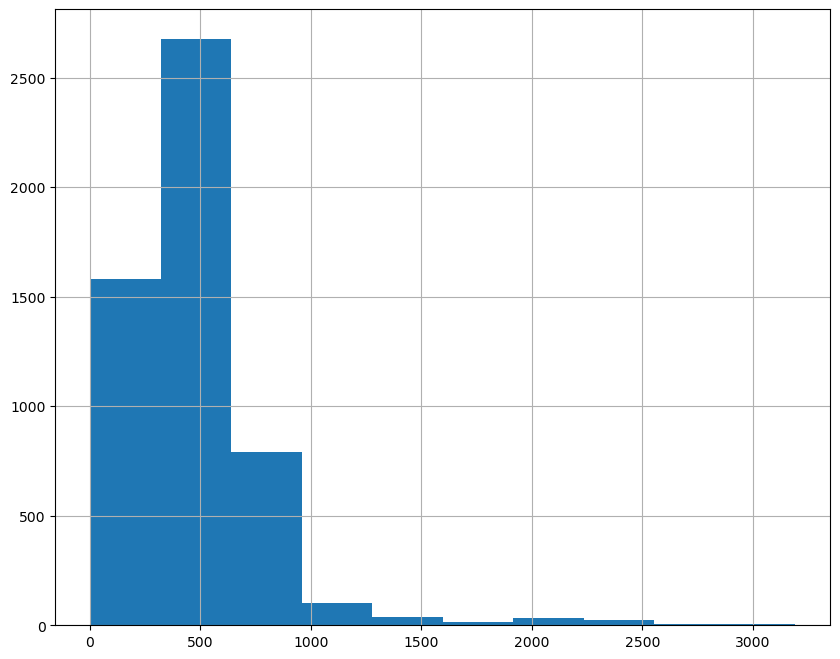

In [44]:
df['parks_nearest'].hist(figsize=(10,8))
df['parks_nearest'].describe()

A large proportion of apartments are sold with parks within walking distance, the most remote park is 3190 meters away.

count    11999.000000
mean       190.305109
std        228.611484
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

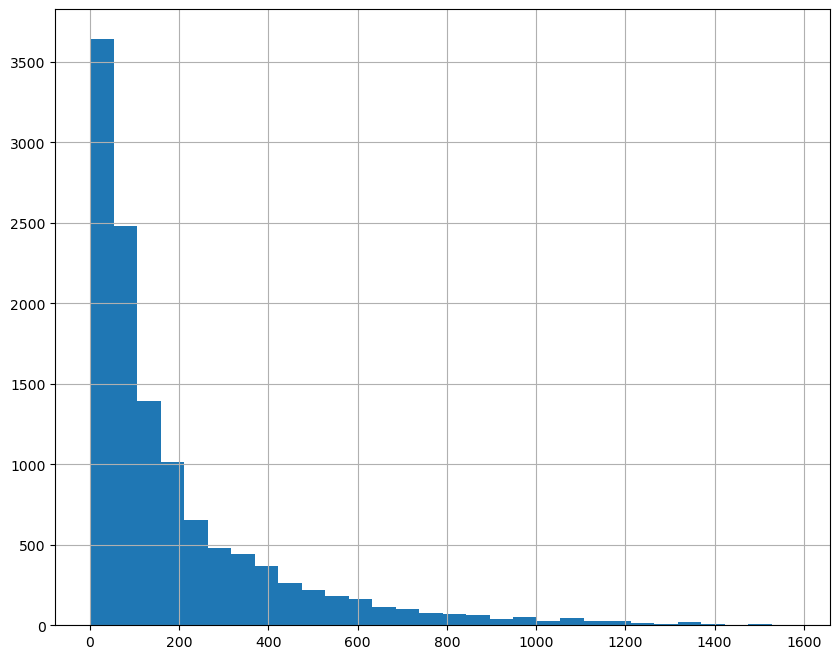

In [45]:
df['days_exposition'].hist(bins=30, figsize=(10,8))
df['days_exposition'].describe()

In [46]:
df['days_exposition'].median()

103.0

We have an average of 180 days on sale, and a median of 95 days. I will build a diagram and limit it by days to Q3 = 231. (to see if there are anomalies)

<AxesSubplot:ylabel='Frequency'>

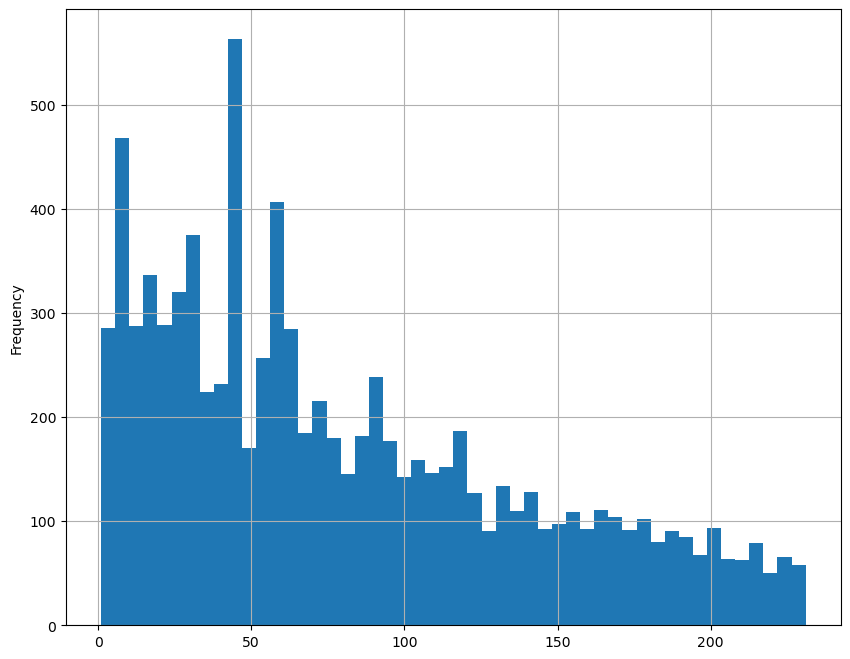

In [47]:
df['days_exposition'].plot(kind='hist', grid=True, bins=50, range=(1, 231), figsize=(10,8))

The graph shows that there are emissions.

In [48]:
df['days_exposition'].value_counts()

45.0      392
60.0      274
7.0       155
30.0      149
4.0       103
         ... 
1013.0      1
1395.0      1
716.0       1
629.0       1
971.0       1
Name: days_exposition, Length: 1035, dtype: int64

The main emissions, the removal of the ad from sale after 45 - 90, as well as 30 - 60 days. Perhaps there are some free ad placements (demo modes, grace periods) that automatically remove ads from sale after passing certain time intervals.(anomalies are multiples of each other). I don't think it's necessary to delete this data from the dataframe.

<AxesSubplot:>

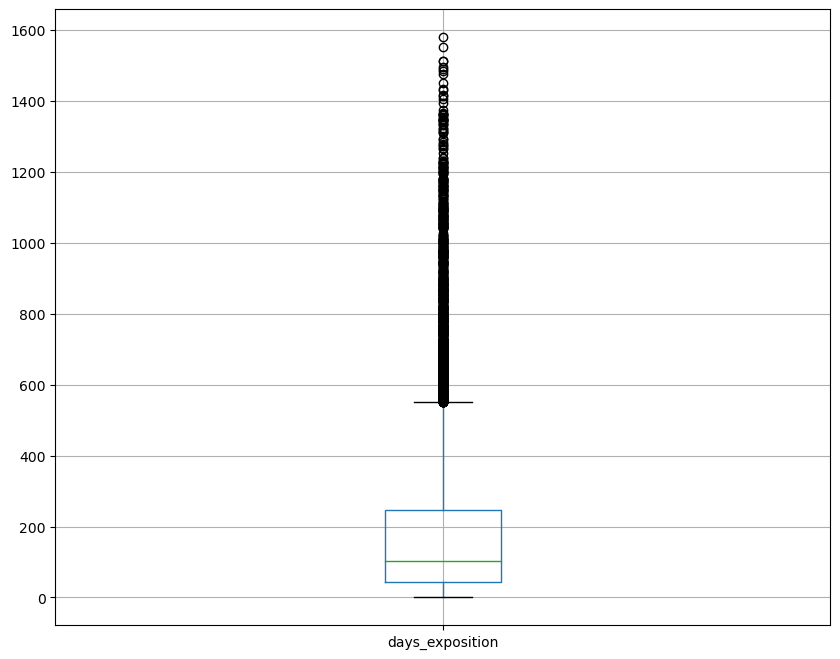

In [49]:
df.boxplot(column=['days_exposition'], figsize=(10, 8))

**Conclusion** The describe method shows us the interquartile span - from 45 to 231 days, and the boxplot span is from one to 500, with a median of 95 days. On average, an apartment is sold in 95 days, but other values up to 500 days are not an extremely long sale. Apartments that have been on sale for more than 500 days are clearly a very long sale.

# 5. Let's study:

* total area;
* living space;
* kitchen areas;
* number of rooms;
* the floor on which the apartment is located (first, last, other);
* dates of placement (day of the week, month, year).
Build graphs that will show the dependence of the price on the above parameters. You can use pivot tables to prepare data before visualization.

**Dependence of the price on the total area**

<AxesSubplot:xlabel='total_area'>

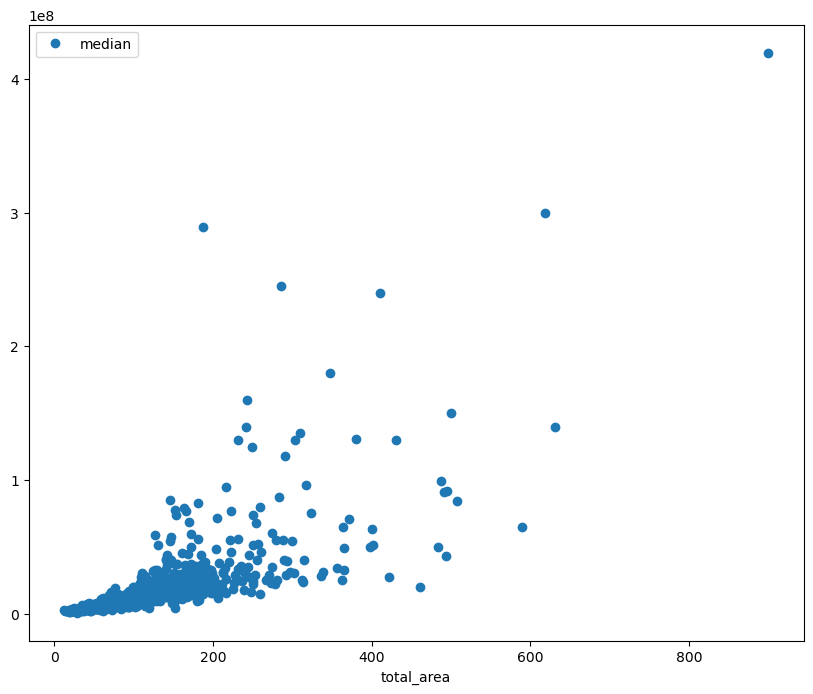

In [50]:
pivot_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [51]:
df['last_price'].corr(df['total_area'])

0.7118257964562305

****Conclusion:** According to the Pearson correlation, the coefficient is 0.65 (the strength of the correlation is average) The larger the total area, the higher the cost of the apartment.

**Dependence of the price on the living area**

<AxesSubplot:xlabel='living_area'>

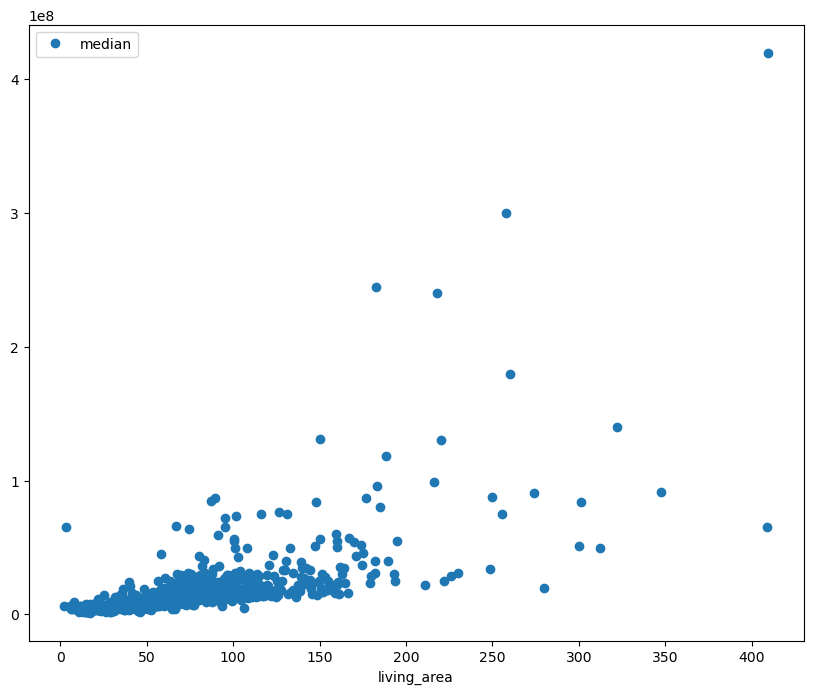

In [52]:
pivot_total_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [53]:
df['last_price'].corr(df['living_area'])

0.6124161648389139

****Conclusion:** According to the Pearson correlation, the coefficient is 0.56 (the strength of the correlation is average) The larger the living area, the higher the cost of the apartment.

**Dependence of the price on the kitchen area**

<AxesSubplot:xlabel='kitchen_area'>

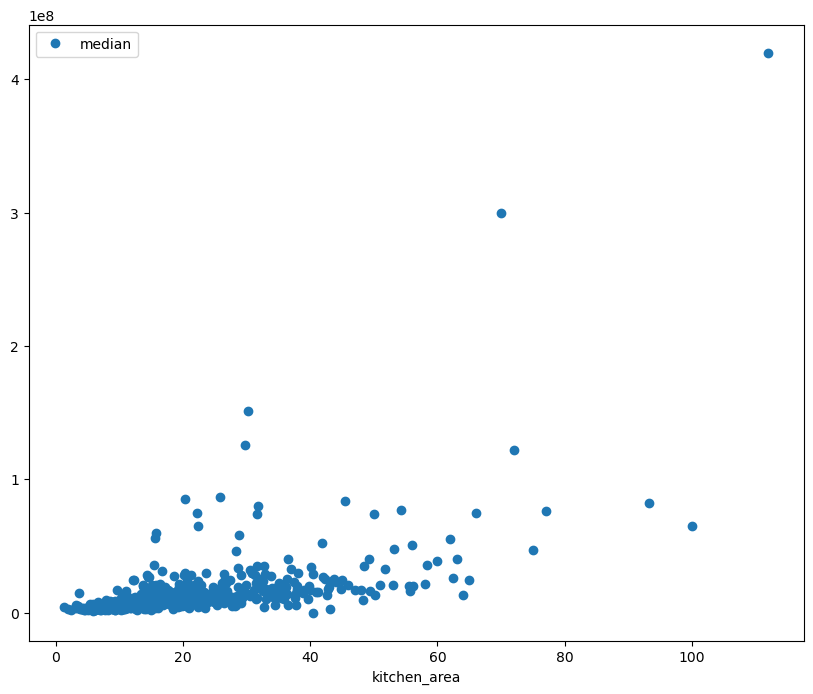

In [54]:
pivot_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [55]:
df['last_price'].corr(df['kitchen_area'])

0.5338239265762235

****Conclusion:** According to the Pearson correlation, the coefficient is 0.51 (the strength of the correlation is average) The larger the kitchen area, the higher the cost of the apartment.

**Dependence of  price on the quantity of rooms**

(0.0, 70000000.0)

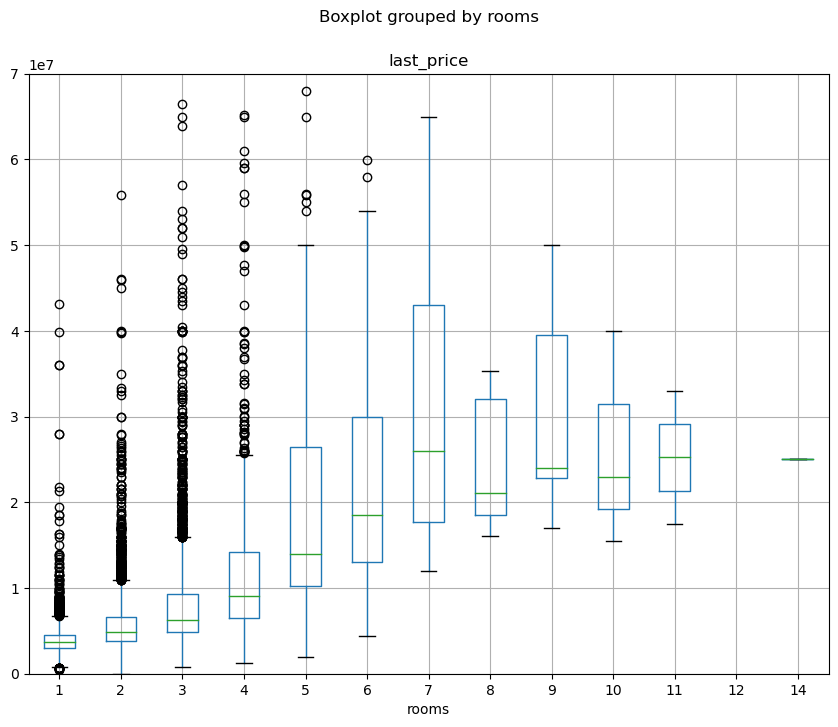

In [56]:
df_filtered = df[df['rooms']<=14]
df_filtered.boxplot('last_price', by='rooms',figsize=(10,8)).set_ylim(0,70000000)

In [57]:
df['rooms'].corr(df['last_price'])

0.4028596580999887

The graph clearly shows us that, depending on the number of rooms, the price increases. There is a clear trend up to 7 rooms, above 7 rooms the chart fluctuates.But the fact that the price increases from the number of rooms is visible.

**Dependence of the price on floor**


(0.0, 20000000.0)

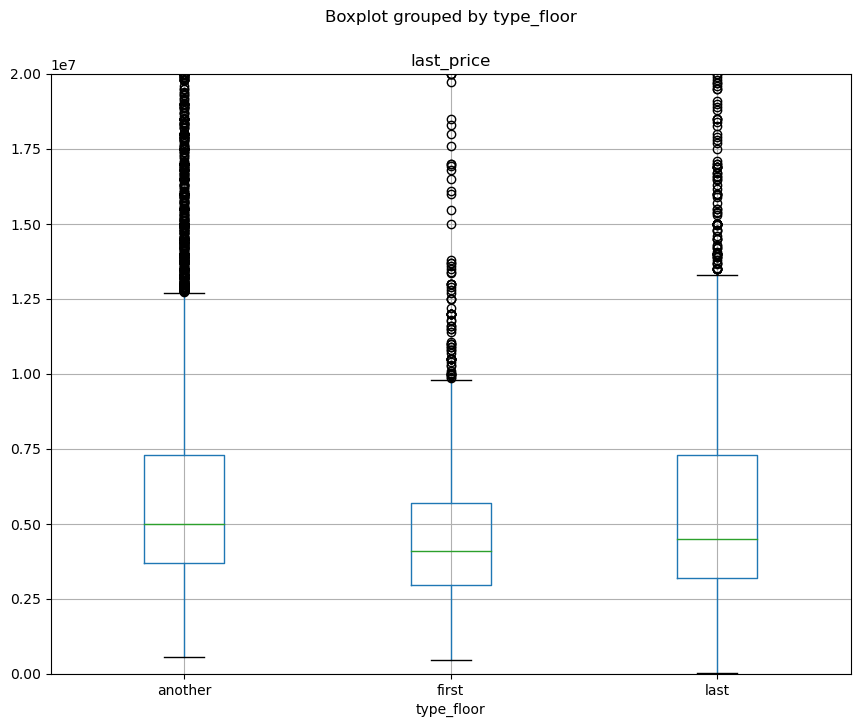

In [58]:
df.boxplot('last_price', by='type_floor',figsize=(10,8)).set_ylim(0,20000000)

(0.0, 20000000.0)

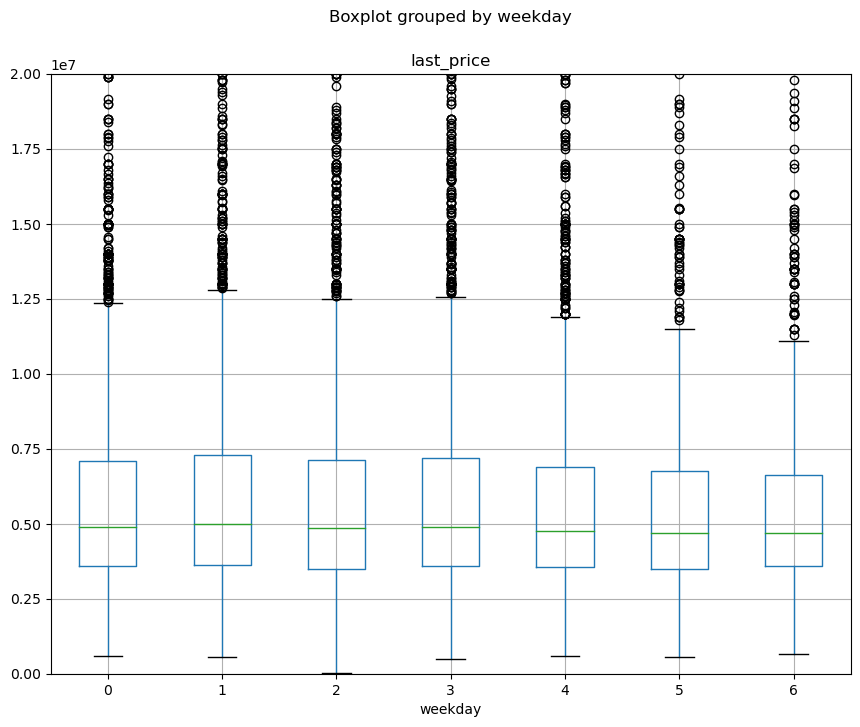

In [59]:
df.boxplot('last_price', by='weekday',figsize=(10,8)).set_ylim(0,20000000)

In [60]:
df['weekday'].corr(df['last_price'])

-0.015754530528140635

**Output:** there is no correlation between the day of the week of publication of the ad and the price.

(0.0, 15000000.0)

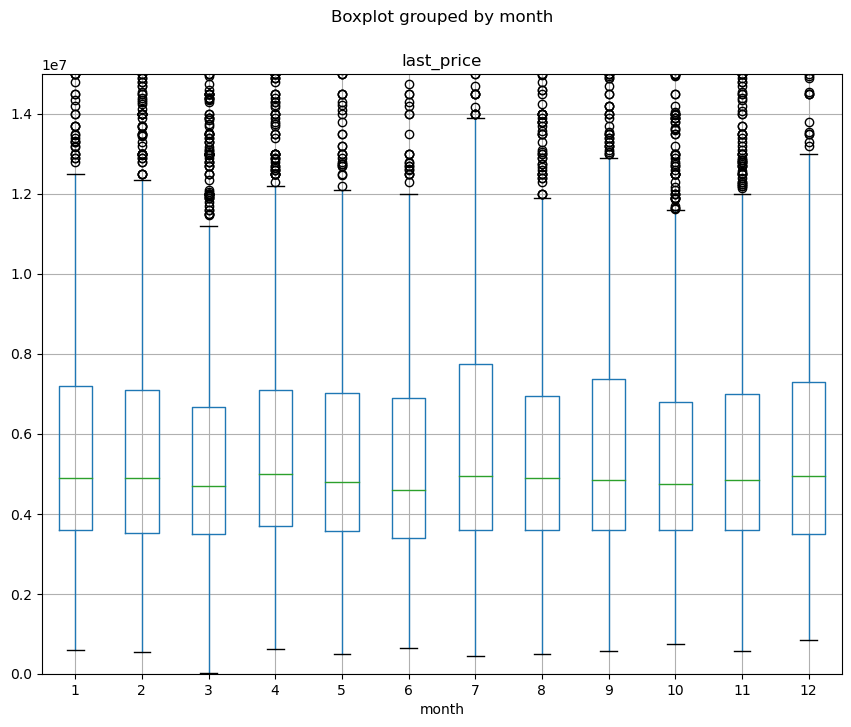

In [61]:
df.boxplot('last_price', by='month',figsize=(10,8)).set_ylim(0,15000000)

In [62]:
df['month'].corr(df['last_price'])

0.0035162529116772455

**Output:** And the month of publication does not affect the final price in any way.

(0.0, 30000000.0)

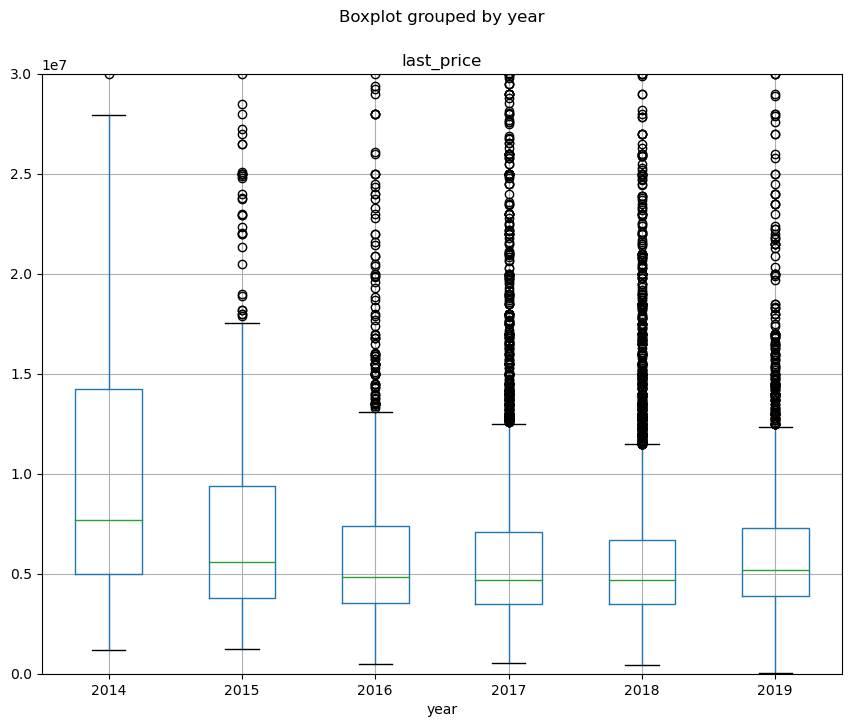

In [63]:
df.boxplot('last_price', by='year',figsize=(10,8)).set_ylim(0,30000000)

**Conclusion:** According to the schedule, the most expensive apartments were in 2014, then prices began to decline until 2017 and not a big increase at all in 2019. Which basically reflects what was happening in the country.

In [64]:
top_10_locations = df['locality_name'].value_counts().head(10)

for location in top_10_locations.index:
    location_data = df[df['locality_name'] == location]
    avg_price_per_sqm = location_data['last_price'].sum() / location_data['total_area'].sum()
    print(f"{location}: {round(avg_price_per_sqm)}")


Санкт-Петербург: 124347
Всеволожск: 66787
Пушкин: 107184
Мурино: 84935
Шушары: 76766
Колпино: 74143
Кудрово: 94304
Гатчина: 69923
Петергоф: 86872
Парголово: 88325


In [65]:
st_petersburg_df = df[df['locality_name'] == 'Санкт-Петербург']
st_petersburg_df = st_petersburg_df.groupby('distance_city_center')['last_price'].mean()
st_petersburg_df.round()

distance_city_center
0.0     22826611.0
1.0     22077548.0
2.0     17513685.0
3.0     11234244.0
4.0     12836774.0
5.0     14288125.0
6.0     15625268.0
7.0     14583196.0
8.0     10693072.0
9.0      7406132.0
10.0     6879417.0
11.0     6366429.0
12.0     5990715.0
13.0     6196063.0
14.0     5632654.0
15.0     5961147.0
16.0     5426578.0
17.0     5382512.0
18.0     4894926.0
19.0     4987383.0
20.0     5456400.0
21.0     5809508.0
22.0     5464979.0
23.0     5138915.0
24.0     4648000.0
25.0     4267500.0
26.0     4162600.0
27.0    14350000.0
28.0     7600000.0
29.0     4114000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='distance_city_center'>

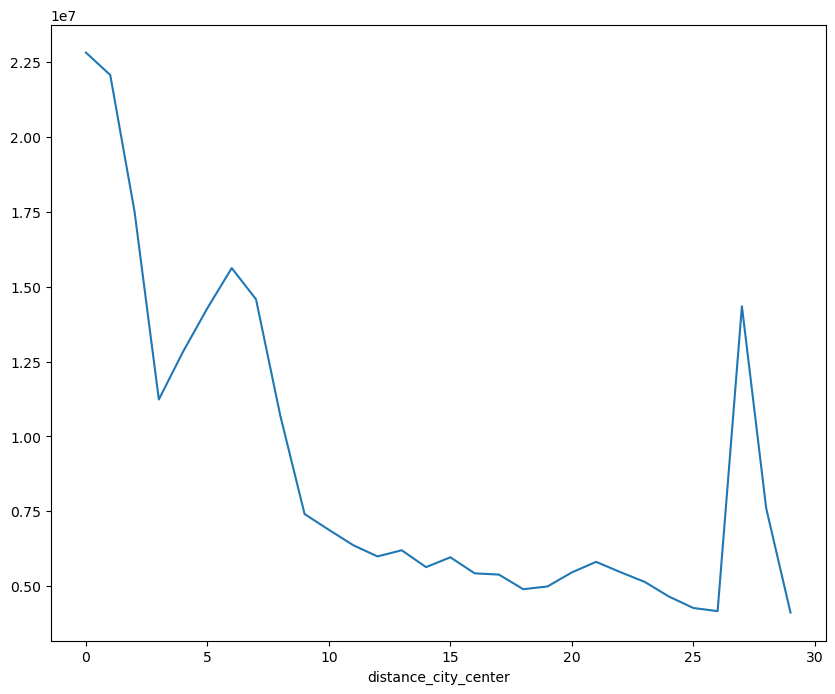

In [66]:
st_petersburg_df.plot(figsize=(10,8))

The general dependence of the cost on the distance to the center : the further the apartment is from the city center, the cheaper it is. But there may also be exceptions depending on all the factors mentioned above, the number of rooms, the total area, etc.Here, the area of the apartment's location probably also plays on the price, perhaps some other factors.( 12km from the center )

# 6. General conclusion.


* The total cost of an apartment in St. Petersburg and the surrounding area depends.

1. Of the total area of the apartment.
2. From the living area of the apartment.
3. From the kitchen area.
4. On the number of rooms.
5. The distance from the center also makes its own adjustments in the formation of the final price.


* The largest sales offer in the city of St. Petersburg, as well as the highest price per square meter. Also in the top 10 for the price of a square, Murino, Shushary, Vyborg closes the top.



* Recommendations it is possible to introduce restrictions on entering data on ceiling height: many mistakes were made (27 m instead of 2.7 m, ceilings less than 2 m, etc.).
* Mandatory field for filling in the number of balconies, names of the location of sale (specify the city, etc.), the number of rooms field cannot be 0.